# 1. Logistická Regrese: Teorie a Příklad
V tomto notebooku se seznámíme se základními koncepty logistické regrese. Začneme vysvětlením, co je to klasifikace, proč pro ni nemůžeme použít lineární regresi a jak nám sigmoidní funkce pomáhá tento problém vyřešit. Nakonec si vše ukážeme na kompletním, ručně spočítaném příkladu.

## 1.1 Úvod do klasifikace
V strojovém učení řešíme dva základní typy předpovědních úloh:

**REGRESE** = předpovídáme **spojité číslo**
- Příklady: Cena domu (3,500,000 Kč), Teplota zítra (23.7°C)

**KLASIFIKACE** = předpovídáme **kategorii (třídu)**
- Příklady: Email (Spam / Ne-spam), Zkouška (Projde / Neprojde)

### Binární klasifikace
Zaměříme se na **binární klasifikaci**, kde existují pouze dvě možné kategorie, které typicky reprezentujeme čísly 0 a 1.

| Kategorie A (negativní) | Kategorie B (pozitivní) | Číselně (A) | Číselně (B) |
|---|---|---|---|
| Neprojde | Projde | 0 | 1 |
| Zdravý | Nemocný | 0 | 1 |
| Ne-spam | Spam | 0 | 1 |

## 1.2 Problém: Proč lineární regrese nestačí?
Zkusme si představit, že máme data o studentech a chceme předpovědět, zda projdou zkouškou (0 nebo 1) na základě hodin učení. Kdybychom použili lineární regresi:

$$y = \beta_0 + \beta_1 x$$

narazili bychom na zásadní problémy.

**Hlavní problém:** Lineární regrese není omezená na výstup v intervalu [0, 1].
- Pro nízké hodnoty $x$ může být výsledek **záporný** (např. -0.25).
- Pro vysoké hodnoty $x$ může být výsledek **větší než 1** (např. 1.25).

**Co znamená pravděpodobnost -25% nebo 125%? To je nesmysl!** Potřebujeme funkci, která výsledek vždy "zmáčkne" do intervalu [0, 1].

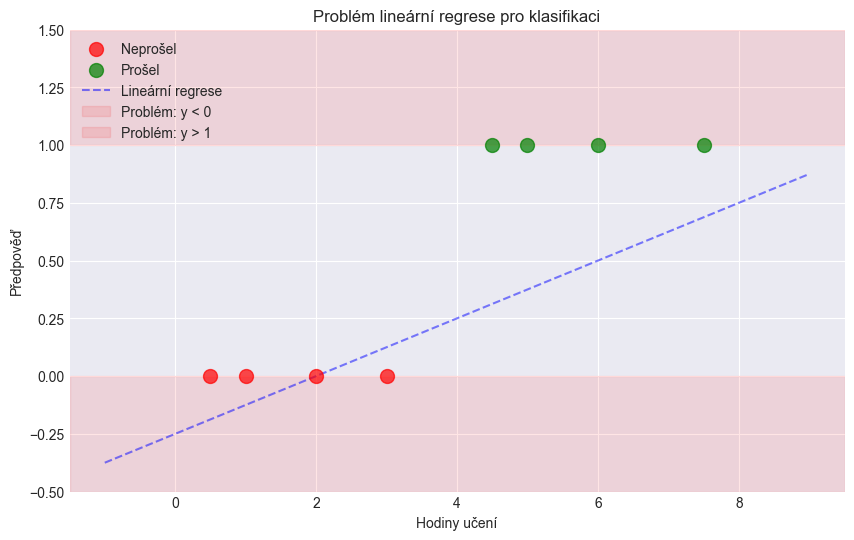

In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (10, 6)

hodiny = np.array([0.5, 1.0, 2.0, 3.0, 4.5, 5.0, 6.0, 7.5])
vysledek = np.array([0, 0, 0, 0, 1, 1, 1, 1])

x_line = np.linspace(-1, 9, 100)
y_line = 0.125 * x_line - 0.25

plt.scatter(hodiny[vysledek==0], vysledek[vysledek==0], color='red', s=100, label='Neprošel', alpha=0.7, zorder=3)
plt.scatter(hodiny[vysledek==1], vysledek[vysledek==1], color='green', s=100, label='Prošel', alpha=0.7, zorder=3)
plt.plot(x_line, y_line, 'b--', label='Lineární regrese', alpha=0.5)

plt.axhspan(-0.5, 0, color='red', alpha=0.1, label='Problém: y < 0')
plt.axhspan(1, 1.5, color='red', alpha=0.1, label='Problém: y > 1')
plt.xlabel('Hodiny učení')
plt.ylabel('Předpověď')
plt.title('Problém lineární regrese pro klasifikaci')
plt.ylim(-0.5, 1.5)
plt.legend(loc='upper left')
plt.show()

## 1.3 Řešení: Sigmoidní (logistická) funkce
Tato "mačkací" funkce se jmenuje **sigmoid**. Vezme jakékoliv reálné číslo a převede ho na hodnotu mezi 0 a 1, kterou můžeme interpretovat jako pravděpodobnost.

### Vzorec sigmoidní funkce

$$\sigma(z) = \frac{1}{1 + e^{-z}}$$

**Vysvětlení symbolů:**
- $\sigma(z)$ = sigmoidní funkce, výstup v intervalu (0, 1)
- $z$ = vstup (libovolné reálné číslo, např. výstup lineární kombinace)
- $e$ = Eulerovo číslo (přibližně 2.718)
- $e^{-z}$ = exponenciální funkce s exponentem $-z$
- $1 + e^{-z}$ = součet jedničky a exponenciály
- $\frac{1}{\text{jmenovatel}}$ = jedna lomeno výrazem ve jmenovateli

### Vlastnosti sigmoidní funkce
- Pro $z = 0$ je $\sigma(z) = 0.5$ (hranice rozhodování)
- Pro $z \to \infty$ se $\sigma(z)$ blíží k 1
- Pro $z \to -\infty$ se $\sigma(z)$ blíží k 0

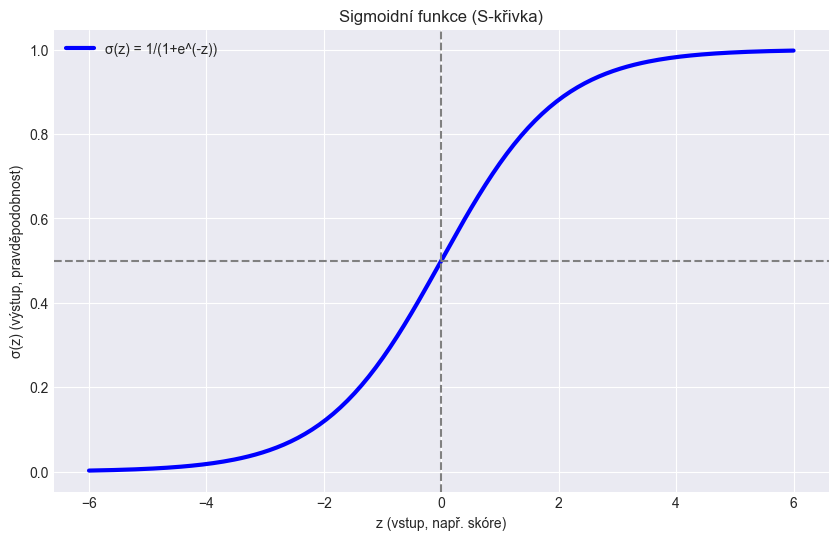

In [2]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

z_values = np.linspace(-6, 6, 200)
sigmoid_values = sigmoid(z_values)

plt.plot(z_values, sigmoid_values, 'b-', linewidth=3, label='σ(z) = 1/(1+e^(-z))')
plt.axhline(y=0.5, color='gray', linestyle='--')
plt.axvline(x=0, color='gray', linestyle='--')
plt.title('Sigmoidní funkce (S-křivka)')
plt.xlabel('z (vstup, např. skóre)')
plt.ylabel('σ(z) (výstup, pravděpodobnost)')
plt.legend()
plt.show()

## 1.4 Kompletní model: Od lineární kombinace k pravděpodobnosti
Logistická regrese kombinuje oba přístupy ve dvou krocích:

**Krok 1 - Lineární kombinace**: Vypočítáme "skóre" $z$ stejně jako u lineární regrese. Toto skóre reprezentuje "sílu důkazu" pro pozitivní třídu.

$$z = \beta_0 + \beta_1 x$$

**Krok 2 - Sigmoid transformace**: Převedeme skóre $z$ na pravděpodobnost $p$.

$$p = \sigma(z) = \frac{1}{1 + e^{-z}}$$

**Finální vzorec pro logistickou regresi:**

$$P(Y=1|x) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 x)}}$$

**Vysvětlení symbolů:**
- $P(Y=1|x)$ = pravděpodobnost, že výsledek je 1 (např. student projde), když známe hodnotu $x$
- $\beta_0$ = intercept (posun, základní sklon k výsledku)
- $\beta_1$ = koeficient (vliv proměnné $x$ na výsledek)
- $x$ = vstupní proměnná (např. hodiny učení)
- $e$ = Eulerovo číslo

Tento model nám dává pravděpodobnost mezi 0 a 1 pro jakoukoliv hodnotu $x$.

## 1.5 Praktická ukázka: Kompletní příklad
Nyní si projdeme kompletní příklad na malém datasetu 7 studentů, abychom viděli, jak se s modelem pracuje.

### Dataset: 7 studentů

| Student | Hodiny učení (x) | Složil zkoušku? (y) |
|---|---|---|
| Anna | 0.5 | 0 |
| Boris | 1.5 | 0 |
| Cilka | 2.5 | 0 |
| David | 3.5 | 1 |
| Eva | 4.5 | 0 |
| Filip | 5.5 | 1 |
| Greta | 6.5 | 1 |

### Nalezený model
Předpokládejme, že jsme již (pomocí metody Maximum Likelihood Estimation, viz další notebook) nalezli optimální parametry modelu:
- $\beta_0 = -3.5$ (intercept)
- $\beta_1 = 1.0$ (koeficient)

Náš model tedy je: 

$$P(Y=1|x) = \frac{1}{1 + e^{-(-3.5 + 1.0 \cdot x)}} = \frac{1}{1 + e^{3.5 - x}}$$

### Výpočet pravděpodobností krok za krokem
Pro každého studenta spočítáme nejprve skóre $z$ a poté pravděpodobnost $P$.

| Student | x | Krok 1: z = -3.5 + 1.0x | Krok 2: P = σ(z) |
|---|---|---|---|
| Anna | 0.5 | -3.5 + 0.5 = -3.0 | σ(-3.0) = **0.047** (4.7%) |
| Boris | 1.5 | -3.5 + 1.5 = -2.0 | σ(-2.0) = **0.119** (11.9%) |
| Cilka | 2.5 | -3.5 + 2.5 = -1.0 | σ(-1.0) = **0.269** (26.9%) |
| David | 3.5 | -3.5 + 3.5 = 0.0 | σ(0.0) = **0.500** (50.0%) |
| Eva | 4.5 | -3.5 + 4.5 = 1.0 | σ(1.0) = **0.731** (73.1%) |
| Filip | 5.5 | -3.5 + 5.5 = 2.0 | σ(2.0) = **0.881** (88.1%) |
| Greta | 6.5 | -3.5 + 6.5 = 3.0 | σ(3.0) = **0.953** (95.3%) |

### Interpretace výsledků a rozhodovací hranice
Rozhodovací hranice je bod, kde je pravděpodobnost 50%. To nastává, když je skóre $z = 0$.

$$-3.5 + 1.0 \cdot x = 0 \implies x = 3.5 \text{ hodin}$$

- **Méně než 3.5 hodiny** → model předpovídá neúspěch (P < 50%)
- **Více než 3.5 hodiny** → model předpovídá úspěch (P > 50%)

| Student | Hodiny | P(úspěch) | Předpověď (práh 0.5) | Skutečnost | Správně? |
|---|---|---|---|---|---|
| Anna | 0.5 | 4.7% | Neuspěje (0) | 0 | ✓ |
| Boris | 1.5 | 11.9% | Neuspěje (0) | 0 | ✓ |
| Cilka | 2.5 | 26.9% | Neuspěje (0) | 0 | ✓ |
| David | 3.5 | 50.0% | Uspěje (1) | 1 | ✓ |
| Eva | 4.5 | 73.1% | Uspěje (1) | 0 | ✗ |
| Filip | 5.5 | 88.1% | Uspěje (1) | 1 | ✓ |
| Greta | 6.5 | 95.3% | Uspěje (1) | 1 | ✓ |

**Přesnost modelu:** 6 ze 7 správně = **85.7%**. Jediná chyba je studentka Eva, která se učila dost, ale přesto neuspěla.

### Zjednodušená interpretace koeficientů
Náš model je $z = -3.5 + 1.0 \cdot x$.

- **$\beta_0 = -3.5$ (Intercept)**: Toto je *základní sklon* k výsledku. Protože je silně záporný, znamená to, že bez učení ($x=0$) je výsledek silně nakloněn k neúspěchu. Pravděpodobnost úspěchu je jen $\sigma(-3.5) \approx 3\%$.

- **$\beta_1 = 1.0$ (Koeficient)**: Toto číslo udává *vliv* hodin učení. Protože je kladné, každá hodina učení navíc **zvyšuje** šanci na úspěch. Jelikož je to poměrně velké číslo (1.0), vliv učení je silný.

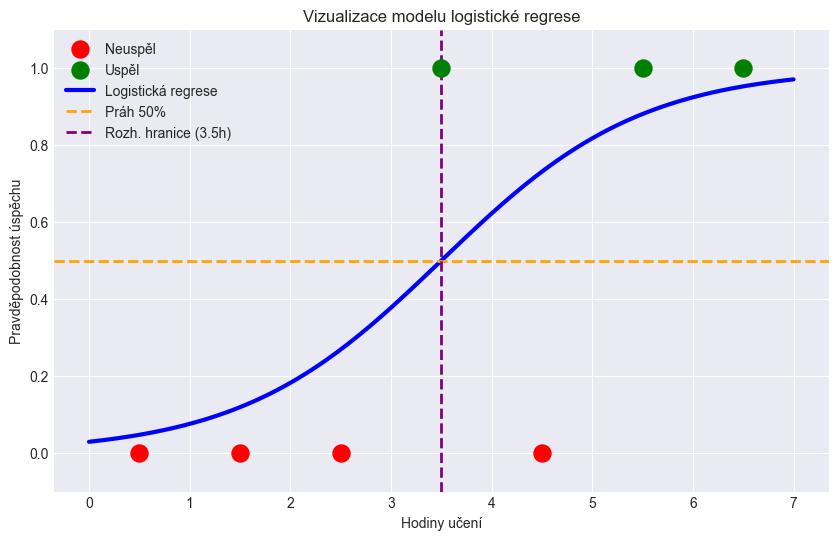

In [3]:
hodiny_data = np.array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5])
uspech_data = np.array([0, 0, 0, 1, 0, 1, 1])

beta_0 = -3.5
beta_1 = 1.0

x_krivka = np.linspace(0, 7, 200)
p_krivka = sigmoid(beta_0 + beta_1 * x_krivka)

plt.figure(figsize=(10, 6))
plt.scatter(hodiny_data[uspech_data==0], uspech_data[uspech_data==0], color='red', s=150, label='Neuspěl', zorder=5)
plt.scatter(hodiny_data[uspech_data==1], uspech_data[uspech_data==1], color='green', s=150, label='Uspěl', zorder=5)
plt.plot(x_krivka, p_krivka, 'b-', linewidth=3, label='Logistická regrese')

plt.axhline(y=0.5, color='orange', linestyle='--', linewidth=2, label='Práh 50%')
plt.axvline(x=3.5, color='purple', linestyle='--', linewidth=2, label='Rozh. hranice (3.5h)')

plt.title('Vizualizace modelu logistické regrese')
plt.xlabel('Hodiny učení')
plt.ylabel('Pravděpodobnost úspěchu')
plt.legend()
plt.ylim(-0.1, 1.1)
plt.show()